<a href="https://colab.research.google.com/github/habutaha/Data-Science-and-Machine-Larning/blob/main/TechCompanyFundingGH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech Company Funding 


* <b>Company</b>: The name of the Company
* <b>Website</b>: The web site of the company
* <b>Region</b>: The country of the company 
* <b>Vertical</b>: The Industry
* <b>Funding Amount (USD)</b>: The amount of the Funding
* <b>Funding Stage</b>: The stage of the Funding 
* <b>Funding Date</b>: The date of the Funding

### Import Data and Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# It is so Important 
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [ ]:
techFundingDf = pd.read_csv('./tech_fundings.csv')
techFundingDf.head()

,index,Company,Website,Region,Vertical,Funding Amount (USD),Funding Stage,Funding Date
0,1,Internxt,https://internxt.com/,Spain,Blockchain,278940,Seed,20-Jan
1,2,Dockflow,https://dockflow.com,Belgium,Logistics,292244,Seed,20-Jan
2,3,api.video,https://api.video,France,Developer APIs,300000,Seed,20-Jan
3,4,Buck.ai,https://buck.ai/,United States,Artificial Intelligence,300000,Seed,20-Jan
4,5,Prodsight,https://www.prodsight.ai,United Kingdom,Artificial Intelligence,529013,Seed,20-Jan


In [ ]:
techFundingDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3575 entries, 0 to 3574
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 3575 non-null   int64 
 1   Company               3575 non-null   object
 2   Website               3575 non-null   object
 3   Region                3563 non-null   object
 4   Vertical              3575 non-null   object
 5   Funding Amount (USD)  3575 non-null   object
 6   Funding Stage         3575 non-null   object
 7   Funding Date          3575 non-null   object
dtypes: int64(1), object(7)
memory usage: 223.6+ KB


In [ ]:
techFundingDf.describe()

,index
count,3575.000000
mean,1788.000000
std,1032.157934
min,1.000000
25%,894.500000
50%,1788.000000
75%,2681.500000
max,3575.000000


## Feature Engineering

### Remove the missing 'Region' values

In [ ]:
# Get a copy of DataFrame without missing 'Region' values
condition = techFundingDf['Region'].notnull()
techFundingDf = techFundingDf[ condition ]
techFundingDf.head()

,index,Company,Website,Region,Vertical,Funding Amount (USD),Funding Stage,Funding Date
0,1,Internxt,https://internxt.com/,Spain,Blockchain,278940,Seed,20-Jan
1,2,Dockflow,https://dockflow.com,Belgium,Logistics,292244,Seed,20-Jan
2,3,api.video,https://api.video,France,Developer APIs,300000,Seed,20-Jan
3,4,Buck.ai,https://buck.ai/,United States,Artificial Intelligence,300000,Seed,20-Jan
4,5,Prodsight,https://www.prodsight.ai,United Kingdom,Artificial Intelligence,529013,Seed,20-Jan


In [ ]:
techFundingDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3563 entries, 0 to 3574
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 3563 non-null   int64 
 1   Company               3563 non-null   object
 2   Website               3563 non-null   object
 3   Region                3563 non-null   object
 4   Vertical              3563 non-null   object
 5   Funding Amount (USD)  3563 non-null   object
 6   Funding Stage         3563 non-null   object
 7   Funding Date          3563 non-null   object
dtypes: int64(1), object(7)
memory usage: 250.5+ KB


### Prepare the 'Funding Amount (USD)'

In [ ]:
# find the numbers of 'Unknown' in the Funding Amount

techFundingDf[ techFundingDf['Funding Amount (USD)'] == 'Unknown' ].index

Int64Index([1262, 1263, 1264, 1284, 1285, 1293, 1301, 1310, 1327], dtype='int64')

In [ ]:
# Removing the 'Unknown' rows from the Funding amount
techFundingDf = techFundingDf.drop([1262,1263,1264,1284,1285,1293,1301,1310,1327], axis=0)
techFundingDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3554 entries, 0 to 3574
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 3554 non-null   int64 
 1   Company               3554 non-null   object
 2   Website               3554 non-null   object
 3   Region                3554 non-null   object
 4   Vertical              3554 non-null   object
 5   Funding Amount (USD)  3554 non-null   object
 6   Funding Stage         3554 non-null   object
 7   Funding Date          3554 non-null   object
dtypes: int64(1), object(7)
memory usage: 249.9+ KB


In [ ]:
len(techFundingDf[ techFundingDf['Funding Amount (USD)'] == 'Unknown' ]['Funding Amount (USD)'])

0

In [ ]:
# Change the 'Funding Amount (USD)' data type from object to float64
techFundingDf['Funding Amount (USD)'] = techFundingDf['Funding Amount (USD)'].astype(str).astype(float)
print(techFundingDf.dtypes)

index                     int64
Company                  object
Website                  object
Region                   object
Vertical                 object
Funding Amount (USD)    float64
Funding Stage            object
Funding Date             object
dtype: object


In [ ]:
techFundingDf.describe()

,index,Funding Amount (USD)
count,3554.000000,3.554000e+03
mean,1785.603545,5.774267e+07
std,1031.960588,2.986841e+08
min,1.000000,4.000000e+04
25%,890.250000,5.000000e+06
50%,1787.500000,1.550830e+07
75%,2678.750000,5.000000e+07
max,3575.000000,1.660000e+10


## Exploratory data analysis (EDA) 

In [ ]:
irreleventFeatures = ['index','Website','Funding Stage','Funding Date']
techFundingDf = techFundingDf.drop(irreleventFeatures,axis=1,inplace=False)
techFundingDf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3554 entries, 0 to 3574
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               3554 non-null   object 
 1   Region                3554 non-null   object 
 2   Vertical              3554 non-null   object 
 3   Funding Amount (USD)  3554 non-null   float64
dtypes: float64(1), object(3)
memory usage: 138.8+ KB


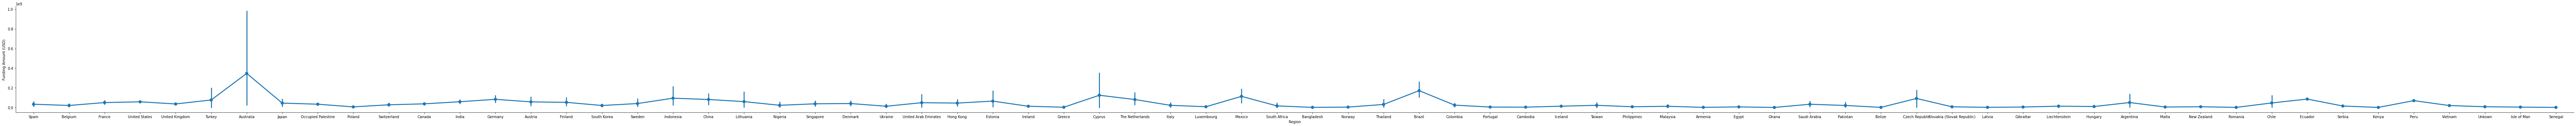

In [ ]:
sns.catplot(x='Region',
            y='Funding Amount (USD)',
            data=techFundingDf,
            kind='point',
            aspect=20) 

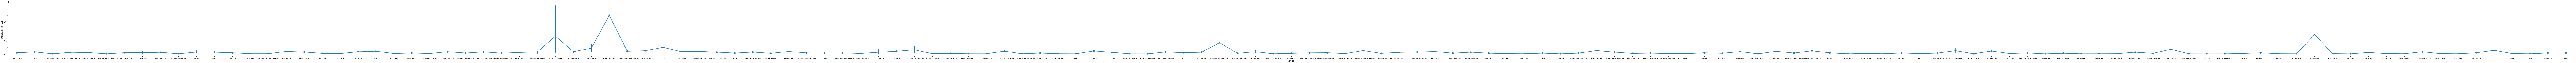

In [ ]:
sns.catplot(x='Vertical',
            y='Funding Amount (USD)',
            data=techFundingDf,
            kind='point',
            aspect=40) 

In [ ]:
fig = px.pie(techFundingDf, values='Funding Amount (USD)', names='Vertical', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
fig = px.pie(techFundingDf, values='Funding Amount (USD)', names='Region', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Apply the one-hot Encoding for ['Region', 'Vertical']

In [ ]:
techFundingDf = pd.get_dummies( techFundingDf, columns=['Region', 'Vertical'] )

In [ ]:
techFundingDf.describe()

,Funding Amount (USD),Region_Argentina,Region_Armenia,Region_Australia,Region_Austria,Region_Bangladesh,Region_Belgium,Region_Belize,Region_Brazil,Region_Cambodia,Region_Canada,Region_Chile,Region_China,Region_Colombia,Region_Cyprus,Region_Czech Republic,Region_Denmark,Region_Ecuador,Region_Egypt,Region_Estonia,Region_Finland,Region_France,Region_Germany,Region_Ghana,Region_Gibraltar,Region_Greece,Region_Hong Kong,Region_Hungary,Region_Iceland,Region_India,Region_Indonesia,Region_Ireland,Region_Isle of Man,Region_Italy,Region_Japan,Region_Kenya,Region_Latvia,Region_Liechtenstein,Region_Lithuania,Region_Luxembourg,...,Vertical_Materials,Vertical_Mechanical Engineering,Vertical_MedTech,Vertical_Media,Vertical_Medical Device,Vertical_Music,Vertical_Neuroscience,Vertical_Nutraceutical,Vertical_POS,Vertical_Packaging,Vertical_Personal Health,Vertical_Pets,Vertical_Podcasting,Vertical_Product Design,Vertical_Professional Networking,Vertical_Quantum Computing,Vertical_Real Estate,Vertical_Recruiting,Vertical_Recycling,Vertical_Robotics,Vertical_Sales,Vertical_Security,Vertical_Sensor,Vertical_Sensors,Vertical_Social Network,Vertical_Supply Chain Management,Vertical_Telecommunications,Vertical_Transportation,Vertical_Travel,Vertical_Venture Capital,Vertical_Video,Vertical_Video Software,Vertical_Video Tech,Vertical_Virtual Reality,Vertical_Warehousing,Vertical_Wearables,Vertical_Web Browsers,Vertical_Web Development,Vertical_Wellbeing,Vertical_Wellness
count,3.554000e+03,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,...,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000
mean,5.774267e+07,0.002251,0.000281,0.014913,0.003658,0.000563,0.005909,0.000281,0.006753,0.000281,0.031232,0.001688,0.003095,0.001688,0.000844,0.001125,0.006190,0.000281,0.001407,0.003939,0.007597,0.027012,0.028419,0.000281,0.000281,0.000281,0.005065,0.000563,0.000563,0.043613,0.006190,0.006472,0.000281,0.002251,0.003658,0.000563,0.000281,0.000563,0.001688,0.000281,...,0.001125,0.000281,0.000281,0.007034,0.000281,0.000563,0.000844,0.000281,0.000281,0.000281,0.000281,0.001125,0.000281,0.000281,0.000281,0.004502,0.016601,0.016320,0.000281,0.008160,0.000844,0.000281,0.000281,0.000281,0.007034,0.000281,0.002251,0.010129,0.009285,0.000281,0.000563,0.000281,0.000281,0.001688,0.000281,0.000281,0.000281,0.000281,0.000281,0.007878
std,2.986841e+08,0.047398,0.016774,0.121221,0.060378,0.023719,0.076652,0.016774,0.081910,0.016774,0.173970,0.041059,0.055555,0.041059,0.029046,0.033534,0.078445,0.016774,0.037487,0.062648,0.086842,0.162141,0.166189,0.016774,0.016774,0.016774,0.070996,0.023719,0.023719,0.204261,0.078445,0.080197,0.016774,0.047398,0.060378,0.023719,0.016774,0.023719,0.041059,0.016774,...,0.033534,0.016774,0.016774,0.083587,0.016774,0.023719,0.029046,0.016774,0.016774,0.016774,0.016774,0.033534,0.016774,0.016774,0.016774,0.066955,0.127789,0.126719,0.016774,0.089975,0.029046,0.016774,0.016774,0.016774,0.083587,0.016774,0.047398,0.100148,0.095925,0.016774,0.023719,0.016774,0.016774,0.041059,0.016774,0.016774,0.016774,0.016774,0.016774,0.088423
min,4.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
#taking a sample to test it later 
testingSample = techFundingDf[1000:1100]
testingSample.head(12)

,Company,Funding Amount (USD),Region_Argentina,Region_Armenia,Region_Australia,Region_Austria,Region_Bangladesh,Region_Belgium,Region_Belize,Region_Brazil,Region_Cambodia,Region_Canada,Region_Chile,Region_China,Region_Colombia,Region_Cyprus,Region_Czech Republic,Region_Denmark,Region_Ecuador,Region_Egypt,Region_Estonia,Region_Finland,Region_France,Region_Germany,Region_Ghana,Region_Gibraltar,Region_Greece,Region_Hong Kong,Region_Hungary,Region_Iceland,Region_India,Region_Indonesia,Region_Ireland,Region_Isle of Man,Region_Italy,Region_Japan,Region_Kenya,Region_Latvia,Region_Liechtenstein,Region_Lithuania,...,Vertical_Materials,Vertical_Mechanical Engineering,Vertical_MedTech,Vertical_Media,Vertical_Medical Device,Vertical_Music,Vertical_Neuroscience,Vertical_Nutraceutical,Vertical_POS,Vertical_Packaging,Vertical_Personal Health,Vertical_Pets,Vertical_Podcasting,Vertical_Product Design,Vertical_Professional Networking,Vertical_Quantum Computing,Vertical_Real Estate,Vertical_Recruiting,Vertical_Recycling,Vertical_Robotics,Vertical_Sales,Vertical_Security,Vertical_Sensor,Vertical_Sensors,Vertical_Social Network,Vertical_Supply Chain Management,Vertical_Telecommunications,Vertical_Transportation,Vertical_Travel,Vertical_Venture Capital,Vertical_Video,Vertical_Video Software,Vertical_Video Tech,Vertical_Virtual Reality,Vertical_Warehousing,Vertical_Wearables,Vertical_Web Browsers,Vertical_Web Development,Vertical_Wellbeing,Vertical_Wellness
1001,Coralogix,25000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1002,Sendinblue,160000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1003,Melio,80000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1004,SpotOn,60000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1005,Airtable,185000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1006,Salsify,155000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1007,Seismic,92000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1008,Antelope Dx,10657976.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1009,Nutcracker Therapeutics,60000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1010,SKALE Labs,5000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
testingSample.drop('Company', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Export the CSV File 
testingSample.to_csv('./testingSample.csv', index= False)

In [ ]:
testingSample

,Funding Amount (USD),Region_Argentina,Region_Armenia,Region_Australia,Region_Austria,Region_Bangladesh,Region_Belgium,Region_Belize,Region_Brazil,Region_Cambodia,Region_Canada,Region_Chile,Region_China,Region_Colombia,Region_Cyprus,Region_Czech Republic,Region_Denmark,Region_Ecuador,Region_Egypt,Region_Estonia,Region_Finland,Region_France,Region_Germany,Region_Ghana,Region_Gibraltar,Region_Greece,Region_Hong Kong,Region_Hungary,Region_Iceland,Region_India,Region_Indonesia,Region_Ireland,Region_Isle of Man,Region_Italy,Region_Japan,Region_Kenya,Region_Latvia,Region_Liechtenstein,Region_Lithuania,Region_Luxembourg,...,Vertical_Materials,Vertical_Mechanical Engineering,Vertical_MedTech,Vertical_Media,Vertical_Medical Device,Vertical_Music,Vertical_Neuroscience,Vertical_Nutraceutical,Vertical_POS,Vertical_Packaging,Vertical_Personal Health,Vertical_Pets,Vertical_Podcasting,Vertical_Product Design,Vertical_Professional Networking,Vertical_Quantum Computing,Vertical_Real Estate,Vertical_Recruiting,Vertical_Recycling,Vertical_Robotics,Vertical_Sales,Vertical_Security,Vertical_Sensor,Vertical_Sensors,Vertical_Social Network,Vertical_Supply Chain Management,Vertical_Telecommunications,Vertical_Transportation,Vertical_Travel,Vertical_Venture Capital,Vertical_Video,Vertical_Video Software,Vertical_Video Tech,Vertical_Virtual Reality,Vertical_Warehousing,Vertical_Wearables,Vertical_Web Browsers,Vertical_Web Development,Vertical_Wellbeing,Vertical_Wellness
1001,25000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1002,160000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1003,80000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1004,60000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1005,185000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,10000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1097,90000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1098,22400000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1099,69000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
testingSample.describe()

,Funding Amount (USD),Region_Argentina,Region_Armenia,Region_Australia,Region_Austria,Region_Bangladesh,Region_Belgium,Region_Belize,Region_Brazil,Region_Cambodia,Region_Canada,Region_Chile,Region_China,Region_Colombia,Region_Cyprus,Region_Czech Republic,Region_Denmark,Region_Ecuador,Region_Egypt,Region_Estonia,Region_Finland,Region_France,Region_Germany,Region_Ghana,Region_Gibraltar,Region_Greece,Region_Hong Kong,Region_Hungary,Region_Iceland,Region_India,Region_Indonesia,Region_Ireland,Region_Isle of Man,Region_Italy,Region_Japan,Region_Kenya,Region_Latvia,Region_Liechtenstein,Region_Lithuania,Region_Luxembourg,...,Vertical_Materials,Vertical_Mechanical Engineering,Vertical_MedTech,Vertical_Media,Vertical_Medical Device,Vertical_Music,Vertical_Neuroscience,Vertical_Nutraceutical,Vertical_POS,Vertical_Packaging,Vertical_Personal Health,Vertical_Pets,Vertical_Podcasting,Vertical_Product Design,Vertical_Professional Networking,Vertical_Quantum Computing,Vertical_Real Estate,Vertical_Recruiting,Vertical_Recycling,Vertical_Robotics,Vertical_Sales,Vertical_Security,Vertical_Sensor,Vertical_Sensors,Vertical_Social Network,Vertical_Supply Chain Management,Vertical_Telecommunications,Vertical_Transportation,Vertical_Travel,Vertical_Venture Capital,Vertical_Video,Vertical_Video Software,Vertical_Video Tech,Vertical_Virtual Reality,Vertical_Warehousing,Vertical_Wearables,Vertical_Web Browsers,Vertical_Web Development,Vertical_Wellbeing,Vertical_Wellness
count,1.000000e+02,100.0,100.0,100.0,100.00,100.0,100.000000,100.0,100.00,100.0,100.00,100.0,100.00,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.000000,100.00,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.00,100.00,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
mean,4.928336e+07,0.0,0.0,0.0,0.01,0.0,0.020000,0.0,0.01,0.0,0.01,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.030000,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.060000,0.01,0.020000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,9.237314e+07,0.0,0.0,0.0,0.10,0.0,0.140705,0.0,0.10,0.0,0.10,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.171447,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.238683,0.10,0.140705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.10,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,3.500000e+05,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3.600000e+06,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.500000e+07,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,5.275000e+07,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,

In [ ]:
techFundingDf.describe()

,Funding Amount (USD),Region_Argentina,Region_Armenia,Region_Australia,Region_Austria,Region_Bangladesh,Region_Belgium,Region_Belize,Region_Brazil,Region_Cambodia,Region_Canada,Region_Chile,Region_China,Region_Colombia,Region_Cyprus,Region_Czech Republic,Region_Denmark,Region_Ecuador,Region_Egypt,Region_Estonia,Region_Finland,Region_France,Region_Germany,Region_Ghana,Region_Gibraltar,Region_Greece,Region_Hong Kong,Region_Hungary,Region_Iceland,Region_India,Region_Indonesia,Region_Ireland,Region_Isle of Man,Region_Italy,Region_Japan,Region_Kenya,Region_Latvia,Region_Liechtenstein,Region_Lithuania,Region_Luxembourg,...,Vertical_Materials,Vertical_Mechanical Engineering,Vertical_MedTech,Vertical_Media,Vertical_Medical Device,Vertical_Music,Vertical_Neuroscience,Vertical_Nutraceutical,Vertical_POS,Vertical_Packaging,Vertical_Personal Health,Vertical_Pets,Vertical_Podcasting,Vertical_Product Design,Vertical_Professional Networking,Vertical_Quantum Computing,Vertical_Real Estate,Vertical_Recruiting,Vertical_Recycling,Vertical_Robotics,Vertical_Sales,Vertical_Security,Vertical_Sensor,Vertical_Sensors,Vertical_Social Network,Vertical_Supply Chain Management,Vertical_Telecommunications,Vertical_Transportation,Vertical_Travel,Vertical_Venture Capital,Vertical_Video,Vertical_Video Software,Vertical_Video Tech,Vertical_Virtual Reality,Vertical_Warehousing,Vertical_Wearables,Vertical_Web Browsers,Vertical_Web Development,Vertical_Wellbeing,Vertical_Wellness
count,3.554000e+03,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,...,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000
mean,5.774267e+07,0.002251,0.000281,0.014913,0.003658,0.000563,0.005909,0.000281,0.006753,0.000281,0.031232,0.001688,0.003095,0.001688,0.000844,0.001125,0.006190,0.000281,0.001407,0.003939,0.007597,0.027012,0.028419,0.000281,0.000281,0.000281,0.005065,0.000563,0.000563,0.043613,0.006190,0.006472,0.000281,0.002251,0.003658,0.000563,0.000281,0.000563,0.001688,0.000281,...,0.001125,0.000281,0.000281,0.007034,0.000281,0.000563,0.000844,0.000281,0.000281,0.000281,0.000281,0.001125,0.000281,0.000281,0.000281,0.004502,0.016601,0.016320,0.000281,0.008160,0.000844,0.000281,0.000281,0.000281,0.007034,0.000281,0.002251,0.010129,0.009285,0.000281,0.000563,0.000281,0.000281,0.001688,0.000281,0.000281,0.000281,0.000281,0.000281,0.007878
std,2.986841e+08,0.047398,0.016774,0.121221,0.060378,0.023719,0.076652,0.016774,0.081910,0.016774,0.173970,0.041059,0.055555,0.041059,0.029046,0.033534,0.078445,0.016774,0.037487,0.062648,0.086842,0.162141,0.166189,0.016774,0.016774,0.016774,0.070996,0.023719,0.023719,0.204261,0.078445,0.080197,0.016774,0.047398,0.060378,0.023719,0.016774,0.023719,0.041059,0.016774,...,0.033534,0.016774,0.016774,0.083587,0.016774,0.023719,0.029046,0.016774,0.016774,0.016774,0.016774,0.033534,0.016774,0.016774,0.016774,0.066955,0.127789,0.126719,0.016774,0.089975,0.029046,0.016774,0.016774,0.016774,0.083587,0.016774,0.047398,0.100148,0.095925,0.016774,0.023719,0.016774,0.016774,0.041059,0.016774,0.016774,0.016774,0.016774,0.016774,0.088423
min,4.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
# Export the CSV File 
techFundingDf.to_csv('./techFundings_cleaned.csv', index= False)

#separate the label and features

In [ ]:
# Select the features and the label
labelDf = techFundingDf['Funding Amount (USD)']
featuresDF= techFundingDf.drop('Funding Amount (USD)', axis=1, inplace=False)

In [ ]:
# Train, Validation, Test Split of the Dataset
trainF, testF, trainL, testL = train_test_split(featuresDF, labelDf, test_size=0.4, random_state=33)

In [ ]:
# Create the train Data Frame by mergining the features and Label
trainDf = pd.concat([trainL, trainF], axis=1, ignore_index=False)
trainDf.head()

,Funding Amount (USD),Company,Region_Argentina,Region_Armenia,Region_Australia,Region_Austria,Region_Bangladesh,Region_Belgium,Region_Belize,Region_Brazil,Region_Cambodia,Region_Canada,Region_Chile,Region_China,Region_Colombia,Region_Cyprus,Region_Czech Republic,Region_Denmark,Region_Ecuador,Region_Egypt,Region_Estonia,Region_Finland,Region_France,Region_Germany,Region_Ghana,Region_Gibraltar,Region_Greece,Region_Hong Kong,Region_Hungary,Region_Iceland,Region_India,Region_Indonesia,Region_Ireland,Region_Isle of Man,Region_Italy,Region_Japan,Region_Kenya,Region_Latvia,Region_Liechtenstein,Region_Lithuania,...,Vertical_Materials,Vertical_Mechanical Engineering,Vertical_MedTech,Vertical_Media,Vertical_Medical Device,Vertical_Music,Vertical_Neuroscience,Vertical_Nutraceutical,Vertical_POS,Vertical_Packaging,Vertical_Personal Health,Vertical_Pets,Vertical_Podcasting,Vertical_Product Design,Vertical_Professional Networking,Vertical_Quantum Computing,Vertical_Real Estate,Vertical_Recruiting,Vertical_Recycling,Vertical_Robotics,Vertical_Sales,Vertical_Security,Vertical_Sensor,Vertical_Sensors,Vertical_Social Network,Vertical_Supply Chain Management,Vertical_Telecommunications,Vertical_Transportation,Vertical_Travel,Vertical_Venture Capital,Vertical_Video,Vertical_Video Software,Vertical_Video Tech,Vertical_Virtual Reality,Vertical_Warehousing,Vertical_Wearables,Vertical_Web Browsers,Vertical_Web Development,Vertical_Wellbeing,Vertical_Wellness
2939,104134987.0,LIQID,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1070,64160218.0,Mosa Meat,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2698,75000000.0,Mythical Games,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
583,6000000.0,CrossTower,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
253,41000000.0,Gousto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Create the test Data Frame by mergining the features and Label
testDf = pd.concat([testL, testF], axis=1, ignore_index=False)
testDf.head()

,Funding Amount (USD),Company,Region_Argentina,Region_Armenia,Region_Australia,Region_Austria,Region_Bangladesh,Region_Belgium,Region_Belize,Region_Brazil,Region_Cambodia,Region_Canada,Region_Chile,Region_China,Region_Colombia,Region_Cyprus,Region_Czech Republic,Region_Denmark,Region_Ecuador,Region_Egypt,Region_Estonia,Region_Finland,Region_France,Region_Germany,Region_Ghana,Region_Gibraltar,Region_Greece,Region_Hong Kong,Region_Hungary,Region_Iceland,Region_India,Region_Indonesia,Region_Ireland,Region_Isle of Man,Region_Italy,Region_Japan,Region_Kenya,Region_Latvia,Region_Liechtenstein,Region_Lithuania,...,Vertical_Materials,Vertical_Mechanical Engineering,Vertical_MedTech,Vertical_Media,Vertical_Medical Device,Vertical_Music,Vertical_Neuroscience,Vertical_Nutraceutical,Vertical_POS,Vertical_Packaging,Vertical_Personal Health,Vertical_Pets,Vertical_Podcasting,Vertical_Product Design,Vertical_Professional Networking,Vertical_Quantum Computing,Vertical_Real Estate,Vertical_Recruiting,Vertical_Recycling,Vertical_Robotics,Vertical_Sales,Vertical_Security,Vertical_Sensor,Vertical_Sensors,Vertical_Social Network,Vertical_Supply Chain Management,Vertical_Telecommunications,Vertical_Transportation,Vertical_Travel,Vertical_Venture Capital,Vertical_Video,Vertical_Video Software,Vertical_Video Tech,Vertical_Virtual Reality,Vertical_Warehousing,Vertical_Wearables,Vertical_Web Browsers,Vertical_Web Development,Vertical_Wellbeing,Vertical_Wellness
2311,5300000.0,QuickNode,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1485,27511959.0,Bold Commerce,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
920,25000000.0,Eden Health,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2121,60229135.0,FintechOS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2420,335000000.0,Back Market,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Checking the lenght of both train and test Data Frame
print(len(trainDf))
print(len(testDf))

2132
1422


In [ ]:
# Export the CSV File 
trainDf.to_csv('./techFunding_train(Final).csv', index= False)
testDf.to_csv('./techFunding_test(Final).csv', index= False)

### Feature engineering for Tech Funding Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# MinMax Sclaer will convert a sequence of number and scale to a range between 0 and 1.
# for example, if the smallest and biggest numbers in a dataset are 20,000 and 100,000
# MinMaxScaler will convert these to 0 and 1


In [ ]:
# dropping the comapny name
trainDf.drop('Company', axis=1, inplace=True)
testDf.drop('Company', axis=1, inplace=True)

In [ ]:
trainDf.head()

,Funding Amount (USD),Region_Argentina,Region_Armenia,Region_Australia,Region_Austria,Region_Bangladesh,Region_Belgium,Region_Belize,Region_Brazil,Region_Cambodia,Region_Canada,Region_Chile,Region_China,Region_Colombia,Region_Cyprus,Region_Czech Republic,Region_Denmark,Region_Ecuador,Region_Egypt,Region_Estonia,Region_Finland,Region_France,Region_Germany,Region_Ghana,Region_Gibraltar,Region_Greece,Region_Hong Kong,Region_Hungary,Region_Iceland,Region_India,Region_Indonesia,Region_Ireland,Region_Isle of Man,Region_Italy,Region_Japan,Region_Kenya,Region_Latvia,Region_Liechtenstein,Region_Lithuania,Region_Luxembourg,...,Vertical_Materials,Vertical_Mechanical Engineering,Vertical_MedTech,Vertical_Media,Vertical_Medical Device,Vertical_Music,Vertical_Neuroscience,Vertical_Nutraceutical,Vertical_POS,Vertical_Packaging,Vertical_Personal Health,Vertical_Pets,Vertical_Podcasting,Vertical_Product Design,Vertical_Professional Networking,Vertical_Quantum Computing,Vertical_Real Estate,Vertical_Recruiting,Vertical_Recycling,Vertical_Robotics,Vertical_Sales,Vertical_Security,Vertical_Sensor,Vertical_Sensors,Vertical_Social Network,Vertical_Supply Chain Management,Vertical_Telecommunications,Vertical_Transportation,Vertical_Travel,Vertical_Venture Capital,Vertical_Video,Vertical_Video Software,Vertical_Video Tech,Vertical_Virtual Reality,Vertical_Warehousing,Vertical_Wearables,Vertical_Web Browsers,Vertical_Web Development,Vertical_Wellbeing,Vertical_Wellness
2939,104134987.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1070,64160218.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2698,75000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
583,6000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
253,41000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
testingSample.head()

,Funding Amount (USD),Region_Argentina,Region_Armenia,Region_Australia,Region_Austria,Region_Bangladesh,Region_Belgium,Region_Belize,Region_Brazil,Region_Cambodia,Region_Canada,Region_Chile,Region_China,Region_Colombia,Region_Cyprus,Region_Czech Republic,Region_Denmark,Region_Ecuador,Region_Egypt,Region_Estonia,Region_Finland,Region_France,Region_Germany,Region_Ghana,Region_Gibraltar,Region_Greece,Region_Hong Kong,Region_Hungary,Region_Iceland,Region_India,Region_Indonesia,Region_Ireland,Region_Isle of Man,Region_Italy,Region_Japan,Region_Kenya,Region_Latvia,Region_Liechtenstein,Region_Lithuania,Region_Luxembourg,...,Vertical_Materials,Vertical_Mechanical Engineering,Vertical_MedTech,Vertical_Media,Vertical_Medical Device,Vertical_Music,Vertical_Neuroscience,Vertical_Nutraceutical,Vertical_POS,Vertical_Packaging,Vertical_Personal Health,Vertical_Pets,Vertical_Podcasting,Vertical_Product Design,Vertical_Professional Networking,Vertical_Quantum Computing,Vertical_Real Estate,Vertical_Recruiting,Vertical_Recycling,Vertical_Robotics,Vertical_Sales,Vertical_Security,Vertical_Sensor,Vertical_Sensors,Vertical_Social Network,Vertical_Supply Chain Management,Vertical_Telecommunications,Vertical_Transportation,Vertical_Travel,Vertical_Venture Capital,Vertical_Video,Vertical_Video Software,Vertical_Video Tech,Vertical_Virtual Reality,Vertical_Warehousing,Vertical_Wearables,Vertical_Web Browsers,Vertical_Web Development,Vertical_Wellbeing,Vertical_Wellness
1001,25000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1002,160000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1003,80000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1004,60000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1005,185000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#instantiate the sclaer
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
# .fit_transform() will apply, (1) feature engineering, (2) training and (3) validation in 1 method_
train_scaled = scaler.fit_transform(trainDf)
test_scaled = scaler.fit_transform(testDf)

In [ ]:
train_scaled

array([[0.0062708 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00386267, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00451567, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00313013, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03252779, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00023855, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
test_scaled

array([[2.76007890e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.44420071e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.31208934e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.88621019e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.52446241e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.25656185e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
# print the numbers that were used to scale the data
print(
    "Multiply by {:.10f} and Add {:.10f}".format(
        scaler.scale_[0],
        scaler.min_[0]
        )
)
# Multiply by 0.0000000005 and Add -0.0000273483


Multiply by 0.0000000005 and Add -0.0000273483


In [ ]:
# export the scales data for the next notebook
trainDf_scaled = pd.DataFrame(train_scaled, columns=trainDf.columns.values)
testDf_scaled = pd.DataFrame(test_scaled, columns=testDf.columns.values)


### Deep Learning for predictiong tech-company Funding

In [ ]:
from keras.models import Sequential
# Sequential will be used to create the three
# layers of neural networks: 
# (1) Input Layer, (2) Hiddens Layers, and (3) Output Layer

# Use '*' to import all three types of layers
from keras.layers import *


In [ ]:
trainDf = trainDf_scaled
trainDf.head()

,Funding Amount (USD),Region_Argentina,Region_Armenia,Region_Australia,Region_Austria,Region_Bangladesh,Region_Belgium,Region_Belize,Region_Brazil,Region_Cambodia,Region_Canada,Region_Chile,Region_China,Region_Colombia,Region_Cyprus,Region_Czech Republic,Region_Denmark,Region_Ecuador,Region_Egypt,Region_Estonia,Region_Finland,Region_France,Region_Germany,Region_Ghana,Region_Gibraltar,Region_Greece,Region_Hong Kong,Region_Hungary,Region_Iceland,Region_India,Region_Indonesia,Region_Ireland,Region_Isle of Man,Region_Italy,Region_Japan,Region_Kenya,Region_Latvia,Region_Liechtenstein,Region_Lithuania,Region_Luxembourg,...,Vertical_Materials,Vertical_Mechanical Engineering,Vertical_MedTech,Vertical_Media,Vertical_Medical Device,Vertical_Music,Vertical_Neuroscience,Vertical_Nutraceutical,Vertical_POS,Vertical_Packaging,Vertical_Personal Health,Vertical_Pets,Vertical_Podcasting,Vertical_Product Design,Vertical_Professional Networking,Vertical_Quantum Computing,Vertical_Real Estate,Vertical_Recruiting,Vertical_Recycling,Vertical_Robotics,Vertical_Sales,Vertical_Security,Vertical_Sensor,Vertical_Sensors,Vertical_Social Network,Vertical_Supply Chain Management,Vertical_Telecommunications,Vertical_Transportation,Vertical_Travel,Vertical_Venture Capital,Vertical_Video,Vertical_Video Software,Vertical_Video Tech,Vertical_Virtual Reality,Vertical_Warehousing,Vertical_Wearables,Vertical_Web Browsers,Vertical_Web Development,Vertical_Wellbeing,Vertical_Wellness
0,0.006271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.003863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.004516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.002467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Use .value attribute to extract features as NumPy array
features = trainDf.drop('Funding Amount (USD)', axis=1, inplace=False).values

# Note: two square brackets because this is a Pandas DataFrame (i.e, multidimensional)
label = trainDf[['Funding Amount (USD)']].values

### Building the Neural Network

In [ ]:
# Instantiate the Sequential class
modelDL = Sequential()

# Add the Input Layer
# Note:
# Dense: is the neural network architecture type
# input_dim: is the number of features
# activation: is the activation function ReLU (Rectified Linear Unit)
modelDL.add( Dense(50, input_dim=215, activation='relu') )

# Add the Hidden Layers
    # the first hidden layer
modelDL.add( Dense(200, activation='relu') )
    # The second hidden layer
modelDL.add( Dense(100, activation='relu') )

# Add the Output Layerswd
modelDL.add( Dense(1, activation='linear') )

# Compile the Deep Learning model
modelDL.compile(loss='mean_squared_error', optimizer='adam')


### Train, Validatioon, and Test

In [ ]:
# Note:
# features is the array of explanatory (random) variables
# label is the array of response (random) variable
# epochs is the number of times to feed the entire data to the model
# shuffle will randomize the features
# verbose will control the logging of TensorFlow

# Here .fit() will train and validate the model
modelDL.fit( features, label, epochs=50, shuffle=True, verbose=20)

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [ ]:
# Import the Test Dataset
testDf = testDf_scaled

In [ ]:
# Select the features and label for test dataset
features_test = testDf.drop('Funding Amount (USD)', axis=1).values
label_test = testDf[['Funding Amount (USD)']].values

In [ ]:
# Evaluate the model before prediction. this will allows
#us to optimize the hyperparameters if necessary.

# Note:
# MSE is ranged between [0, +infinity)
metric_mse = modelDL.evaluate(features_test, label_test, verbose=0)

In [ ]:
# Print the MSE after evaluation
print(" The MSE (Mean Squared Error): {}".format(metric_mse))

 The MSE (Mean Squared Error): 0.003896993352100253


In [ ]:
# Convert from scintific notation to float
print('%f' % metric_mse )

0.003897
